# Correlation between entropy/FD metrics

https://stochastic.readthedocs.io/en/stable/noise.html#stochastic.processes.noise.ColoredNoise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import entropy as ent
import matplotlib.pyplot as plt
import stochastic.processes.noise as sn
sns.set(font_scale=1.25)

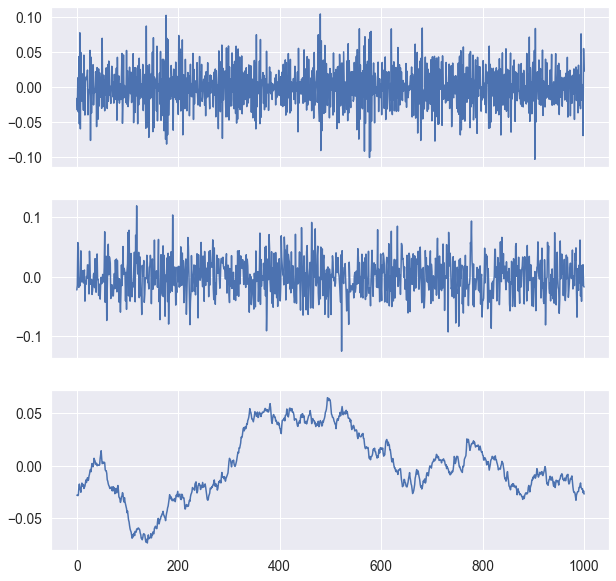

In [2]:
# Generate time-series with increasing B exponent
betas = np.arange(-2, 2.1, 0.1)
n_ts = betas.size
n_samples = 1000
sf = 10
ts = np.empty((n_ts, n_samples + 1))

for i, b in enumerate(betas):
    rng = np.random.default_rng(42)
    ts[i] = sn.ColoredNoise(beta=b, rng=rng).sample(n_samples)
    
# Plot the first, center and last time-series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=False)
ax1.plot(ts[0])  # Violet noise
ax2.plot(ts[int(n_ts / 2)])  # White noise
ax3.plot(ts[-1]);  # Brownian noise

In [3]:
# Compute the entropy metrics
df = pd.DataFrame()

for i in range(n_ts):
    df = df.append({
        'PermEnt': ent.perm_entropy(ts[i], order=3, normalize=True),
        'SVDEnt' : ent.svd_entropy(ts[i], order=3, normalize=True),
        'SpecEnt' : ent.spectral_entropy(ts[i], sf, normalize=True, 
                                         method='welch', nperseg=50),
        'AppEnt': ent.app_entropy(ts[i], order=2),
        'SampleEnt': ent.sample_entropy(ts[i], order=2),
        'PetrosianFD': ent.petrosian_fd(ts[i]),
        'KatzFD': ent.katz_fd(ts[i]),
        'HiguchiFD': ent.higuchi_fd(ts[i]),
        'DFA': ent.detrended_fluctuation(ts[i])}, ignore_index=True)

df.head().round(3)

,AppEnt,DFA,HiguchiFD,KatzFD,PermEnt,PetrosianFD,SVDEnt,SampleEnt,SpecEnt
0,1.555,0.072,2.068,7.144,0.981,1.041,0.910,1.841,0.849
1,1.585,0.073,2.067,8.722,0.985,1.040,0.922,1.907,0.868
2,1.619,0.084,2.065,5.645,0.988,1.040,0.930,1.952,0.879
3,1.594,0.096,2.066,5.034,0.988,1.040,0.931,1.948,0.884
4,1.628,0.098,2.061,5.342,0.985,1.040,0.927,1.949,0.869


In [4]:
# Describe
df.agg(['min', 'median', 'max']).round(2).T

,min,median,max
AppEnt,0.27,1.62,1.71
DFA,0.07,0.51,1.56
HiguchiFD,1.46,2.00,2.07
KatzFD,1.84,5.19,8.72
PermEnt,0.94,0.99,1.00
PetrosianFD,1.02,1.04,1.04
SVDEnt,0.28,0.95,1.00
SampleEnt,0.25,2.00,2.27
SpecEnt,0.46,0.92,0.99


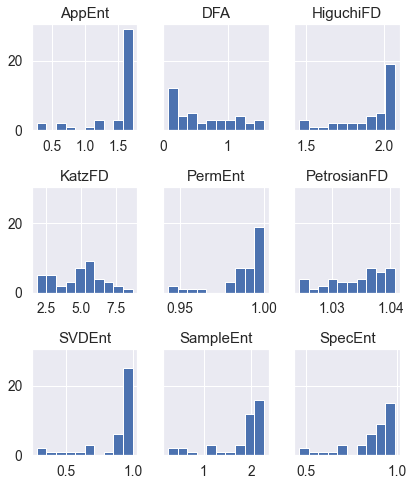

In [6]:
# Distribution
df.hist(figsize=(6, 7), layout=(3, 3), sharey=True)
plt.tight_layout()

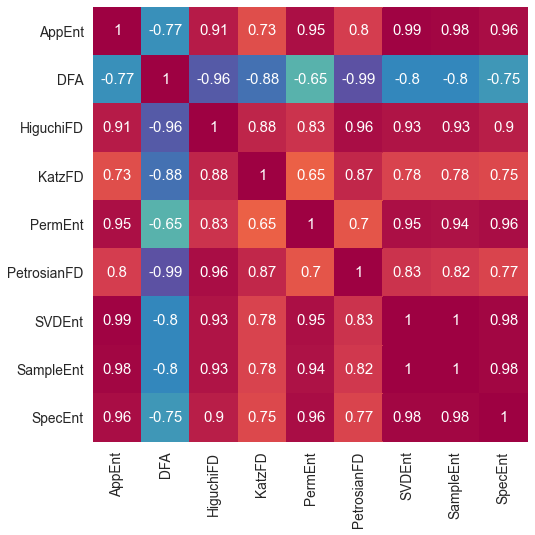

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cbar=False, 
            cmap='Spectral_r', square=True);

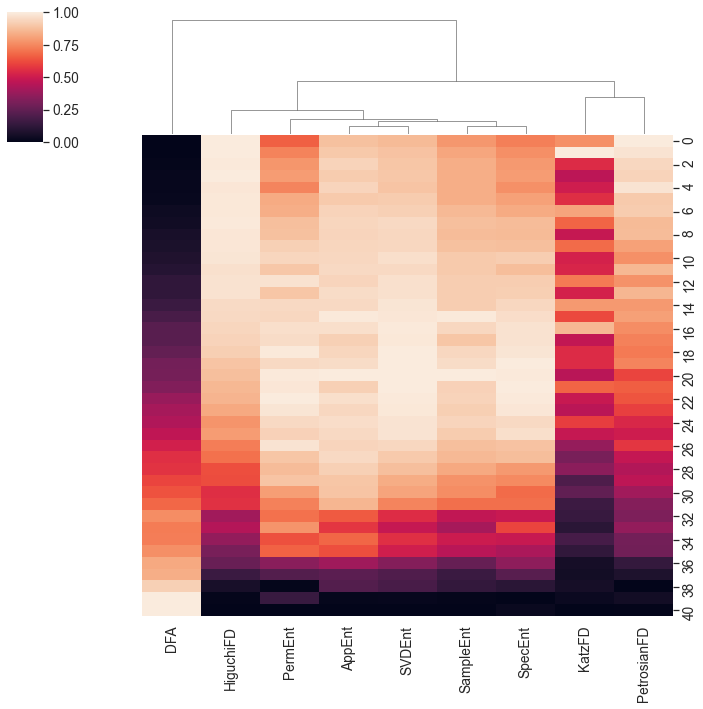

In [8]:
sns.clustermap(df.interpolate(), row_cluster=False, standard_scale=1);